# Import the main libiraries

In [1]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import os

# Load the DataSet

In [2]:
## Read the Csv file
data = pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv")

In [3]:
df_cars=data.copy()

# inspect the Data

In [4]:
# Summary to all colums 
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df_cars)

,column,dtypes,nunique,sum_null
0,car_ID,int64,205,0
1,symboling,int64,6,0
2,CarName,object,147,0
3,fueltype,object,2,0
4,aspiration,object,2,0
5,doornumber,object,2,0
6,carbody,object,5,0
7,drivewheel,object,3,0
8,enginelocation,object,2,0
9,wheelbase,float64,53,0


In [5]:
# Show the head of the dataFrame 
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
## Some statistics on data 
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
## check nulls of data 
df_cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- Their is no null values

In [8]:
# Check the Duplicates in dataset
df_cars.duplicated().sum()

0

- Their is No duplicates in the data 

In [9]:
df_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
# Drop the CarID column
df_cars.drop('car_ID',axis=1,inplace=True)

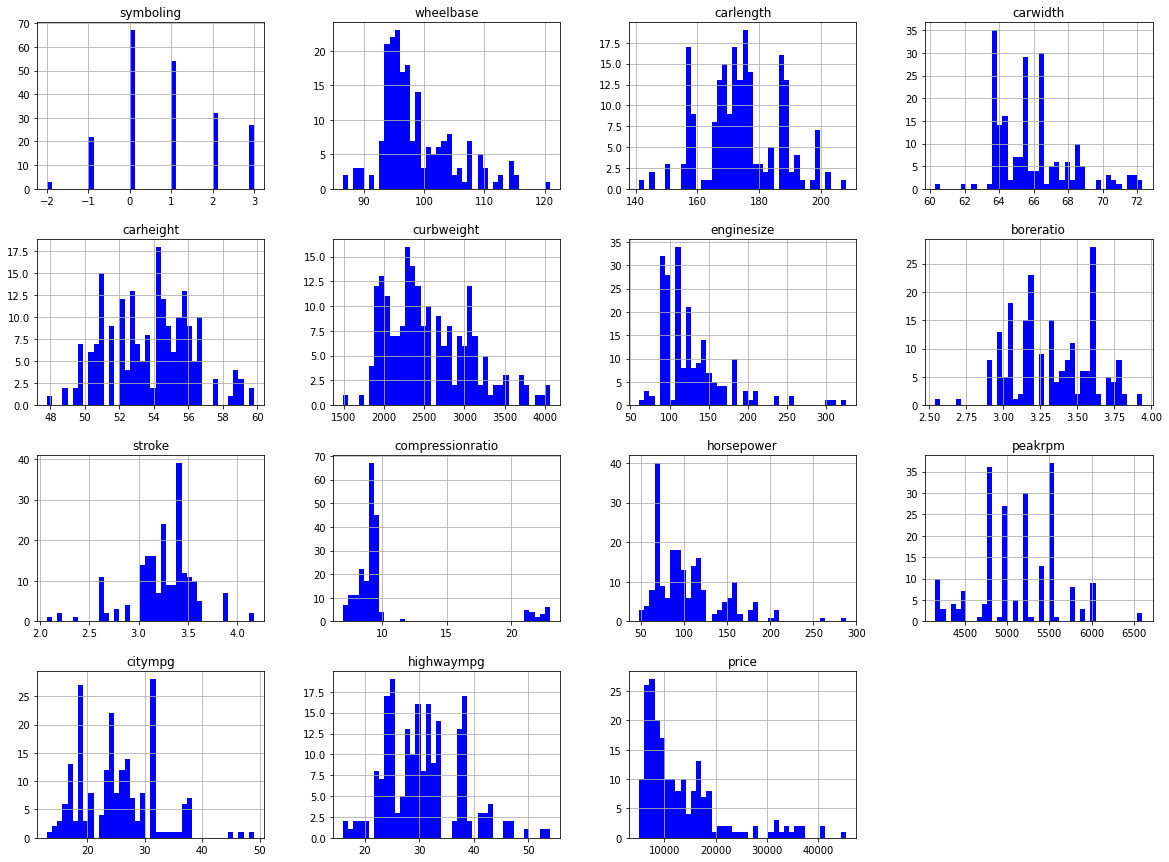

In [11]:
# Histogram to all the nummeric columns
df_cars.hist(bins=40,figsize=(20,15),color='b');

In [12]:
# Get the main names of cars
df_cars['CarName'] = df_cars['CarName'].str.split(' ',expand=True)[0]

In [13]:
# Unique names of cars
df_cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
#  Fix the mistakes in cars names 
df_cars['CarName'] = df_cars['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [15]:
# Unique names of cars after updating
df_cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
# Select the categorical columns
categorical_cols=df_cars.select_dtypes(include=['object']).columns

In [17]:
# print all the unique values of all categorical columns
for i in categorical_cols:
    print(i,'unique values')
    print('-----------------------------------')
    print(df_cars[i].unique())
    print('-----------------------------------------------------------------------------')


CarName unique values
-----------------------------------
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
-----------------------------------------------------------------------------
fueltype unique values
-----------------------------------
['gas' 'diesel']
-----------------------------------------------------------------------------
aspiration unique values
-----------------------------------
['std' 'turbo']
-----------------------------------------------------------------------------
doornumber unique values
-----------------------------------
['two' 'four']
-----------------------------------------------------------------------------
carbody unique values
-----------------------------------
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
-----------------------------------------------------------------------------


- toyota is the maximum one 

In [18]:
le = LabelEncoder()
df_cars['CarName'] = le.fit_transform(df_cars['CarName'])
df_cars['fueltype'] = le.fit_transform(df_cars['fueltype'])
df_cars['aspiration'] = le.fit_transform(df_cars['aspiration'])
df_cars['doornumber'] = le.fit_transform(df_cars['doornumber'])
df_cars['carbody'] = le.fit_transform(df_cars['carbody'])
df_cars['drivewheel'] = le.fit_transform(df_cars['drivewheel'])
df_cars['enginelocation'] = le.fit_transform(df_cars['enginelocation'])
df_cars['enginetype'] = le.fit_transform(df_cars['enginetype'])
df_cars['cylindernumber'] = le.fit_transform(df_cars['cylindernumber'])
df_cars['fuelsystem'] = le.fit_transform(df_cars['fuelsystem'])

<AxesSubplot:>

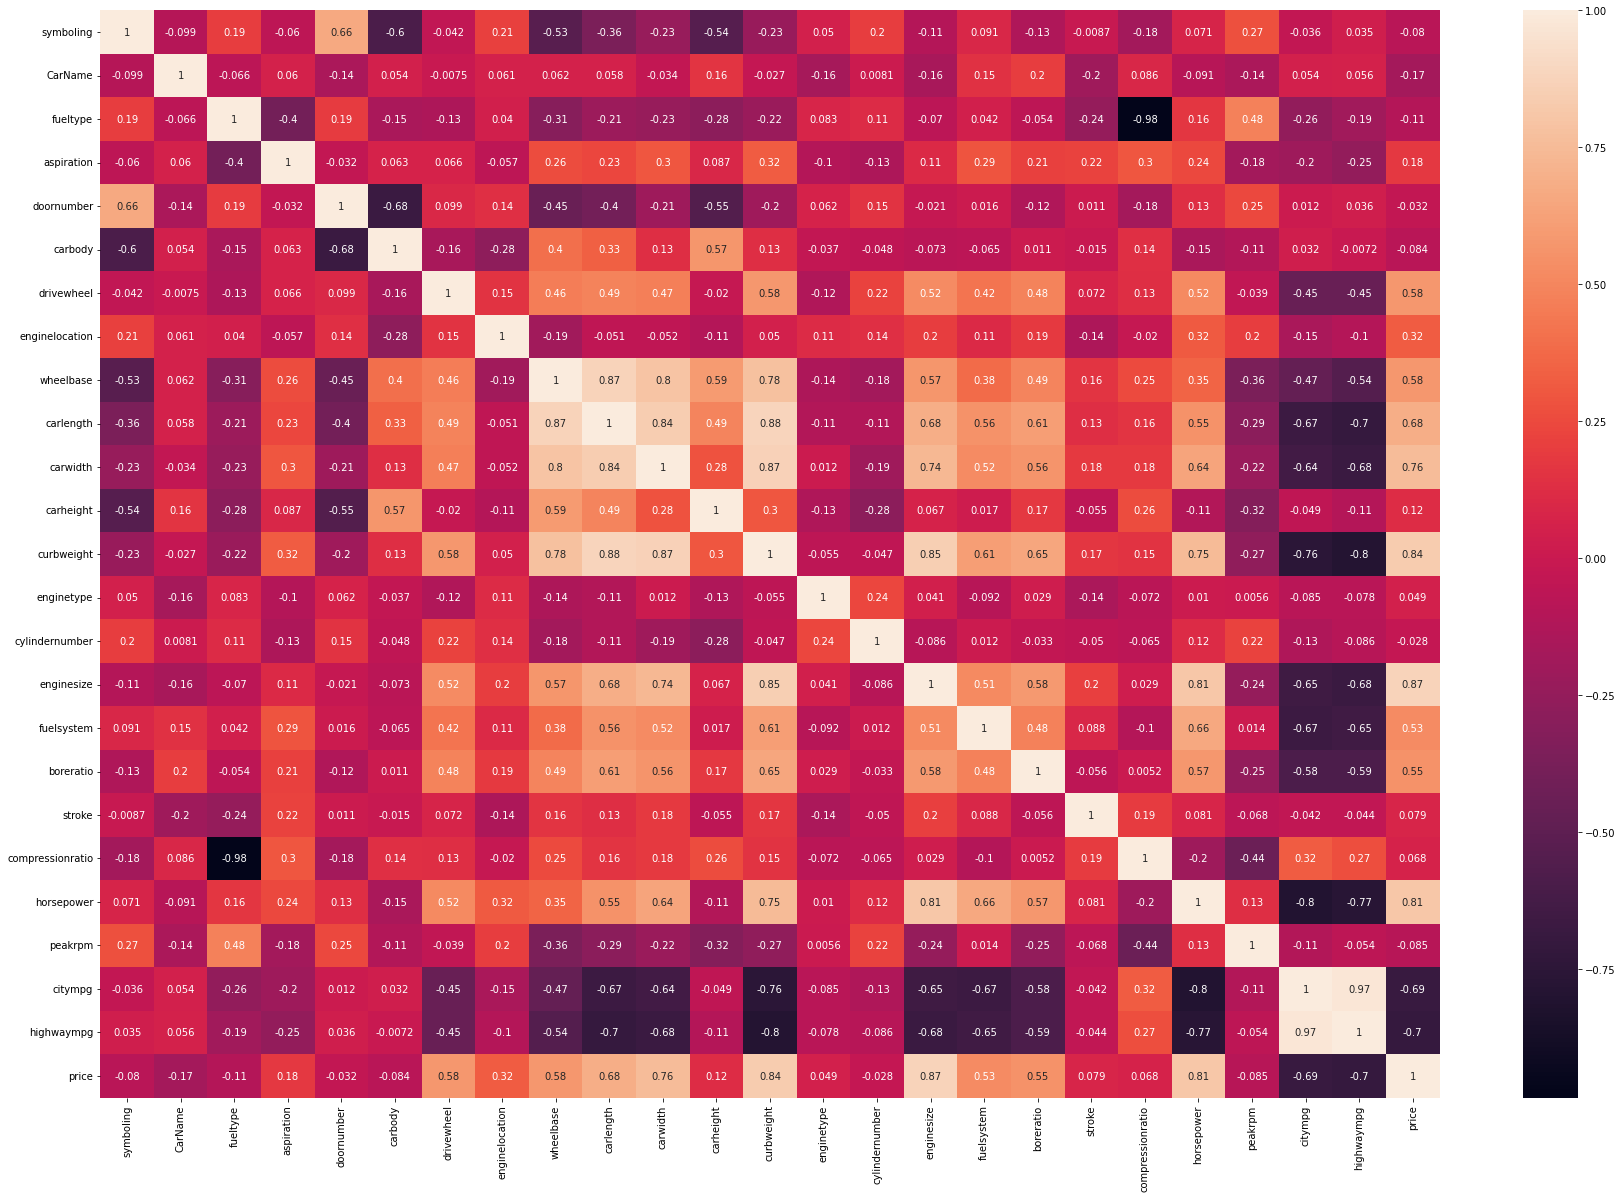

In [19]:
plt.figure(figsize=(30,20))
c = df_cars.corr()
sns.heatmap(c,annot=True)

# Comment 
>  Price has high correlation with{wheelbase , carlength , carwidth , curbweight , enginesize , boreratio , horsepower , citympg , highwaympg , drivewheel , fuelsystem }

# Train Test Split 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
cars = df_cars[['wheelbase' , 'carlength' , 'carwidth' , 'curbweight' , 
                'enginesize' ,'boreratio' , 'horsepower' , 'citympg' ,
                'highwaympg' , 'drivewheel' , 'fuelsystem','price' ]]
x = cars.drop('price',axis=1).values
y = cars['price'].values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=42)

# Data scaling using robust regression

In [23]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear regression model

In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
reg.score(x_train,y_train)

0.8313498634666621

In [26]:
reg.score(x_test,y_test)

0.7967797841219427

In [27]:
reg.intercept_

11232.818829689837

In [28]:
reg.coef_

array([-2.37721399e+02,  2.79728771e+00,  1.80443248e+03,  7.76706582e+02,
        3.46784881e+03, -4.33940330e+02,  1.98870281e+03, -5.18090497e+02,
       -6.12200370e+02,  1.38302142e+03, -6.50777960e+02])

In [29]:
pd.DataFrame(reg.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
wheelbase,-237.721399
carlength,2.797288
carwidth,1804.432479
curbweight,776.706582
enginesize,3467.848814
boreratio,-433.940330
horsepower,1988.702810
citympg,-518.090497
highwaympg,-612.200370
drivewheel,1383.021424


In [30]:
y_pred_1 = reg.predict(x_test)

In [31]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [32]:
df_1.head(10)

,y_test,Y_pred
0,30760.000,24274.430865
1,17859.167,16295.393865
2,9549.000,11626.940703
3,11850.000,12969.844222
4,28248.000,22449.854465
5,7799.000,7805.288157
6,7788.000,7490.623333
7,9258.000,8585.152078
8,10198.000,10275.493060
9,7775.000,7366.226902


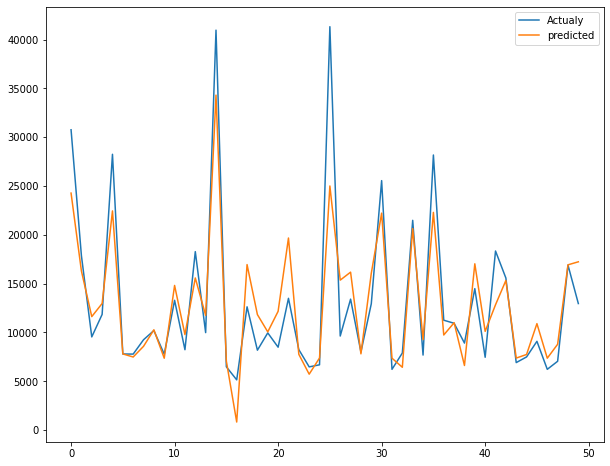

In [33]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

# Ridge Model


In [34]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [35]:
rid.score(x_train,y_train)

0.8313234367912665

In [36]:
rid.score(x_test,y_test)

0.7959485355363426

In [37]:
rid.intercept_

11259.73912019491

In [38]:
rid.coef_

array([-216.96935365,    4.57810559, 1766.86892565,  828.20780259,
       3416.24764907, -407.89790612, 2004.96506342, -500.73970109,
       -606.67678096, 1340.37311795, -606.01337478])

In [39]:
pd.DataFrame(rid.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
wheelbase,-216.969354
carlength,4.578106
carwidth,1766.868926
curbweight,828.207803
enginesize,3416.247649
boreratio,-407.897906
horsepower,2004.965063
citympg,-500.739701
highwaympg,-606.676781
drivewheel,1340.373118


In [40]:
y_pred_2 = rid.predict(x_test)

In [41]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [42]:
df_2.head(10)

,y_test,Y_pred
0,30760.000,24262.166752
1,17859.167,16378.562523
2,9549.000,11625.992179
3,11850.000,13030.053828
4,28248.000,22440.571626
5,7799.000,7807.991336
6,7788.000,7532.152452
7,9258.000,8586.493228
8,10198.000,10349.490759
9,7775.000,7393.542583


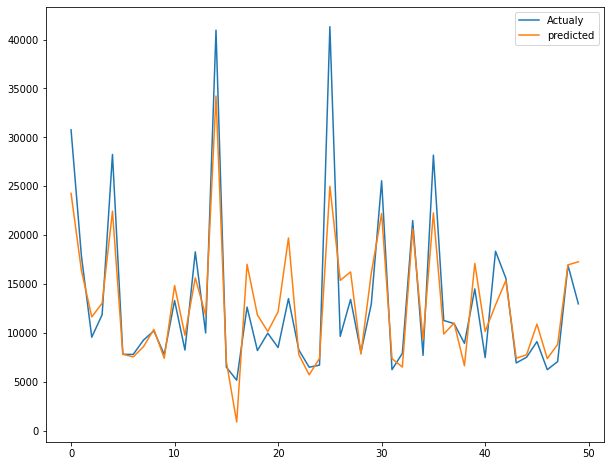

In [43]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actualy","predicted"]);

# Lasso Model

In [44]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.6)
lass.fit(x_train,y_train)

Lasso(alpha=0.6)

In [45]:
lass.score(x_train,y_train)

0.8313495176385546

In [46]:
lass.score(x_test,y_test)

0.7967360444038143

In [47]:
lass.intercept_

11236.828029666754

In [48]:
lass.coef_

array([-230.15244747,    0.        , 1801.29662187,  767.98757895,
       3469.85670269, -430.08927678, 1990.79537959, -513.62632363,
       -612.81269722, 1378.58182592, -642.4868575 ])

In [49]:
pd.DataFrame(lass.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
wheelbase,-230.152447
carlength,0.000000
carwidth,1801.296622
curbweight,767.987579
enginesize,3469.856703
boreratio,-430.089277
horsepower,1990.795380
citympg,-513.626324
highwaympg,-612.812697
drivewheel,1378.581826


In [50]:
y_pred_3 = lass.predict(x_test)

In [51]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [52]:
df_3.head(10)

,y_test,Y_pred
0,30760.000,24277.241566
1,17859.167,16298.047245
2,9549.000,11628.887264
3,11850.000,12974.617607
4,28248.000,22443.656377
5,7799.000,7808.346402
6,7788.000,7498.812744
7,9258.000,8586.761758
8,10198.000,10284.849555
9,7775.000,7370.805858


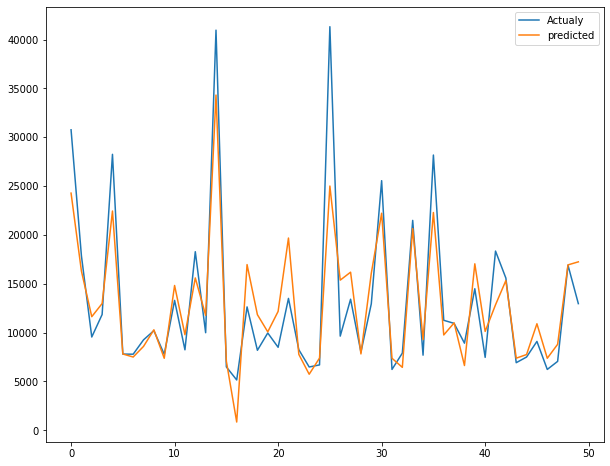

In [53]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actualy","predicted"]);

# Evaluating models


### Linear reg evaluation

In [54]:
#import r2_score 
from sklearn.metrics import r2_score

In [55]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [56]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.7809257247272007

In [57]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [58]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [59]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

13749785.691257391

In [60]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

2484.5027786707374

In [61]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.18674370711015695

In [62]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

3708.0703460502727

### Ridge Evaluation

In [63]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.7959485355363426

In [64]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.7800296269611636

In [65]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [66]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

13806027.585592452

In [67]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

2489.940690495101

In [68]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.18697605789037744

In [69]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

3708.0703460502727

### Lasso Evaluation

In [70]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [71]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.7808785726906367

In [72]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [73]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

13752745.100329284

In [74]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

2485.105712429467

In [75]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.18680309797634667

In [76]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

3708.0703460502727

# Comapring The Three Models

In [77]:
models = ["Linear","Ridge","Lasso"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Linear,0.796780,1.374979e+07
Lasso,0.796736,1.375275e+07
Ridge,0.795949,1.380603e+07
